In [1]:
import pandas as pd

caminho_arquivo = r"C:\Users\Caio do Carmo Carlos\Documents\Git\analise-lotofacil\dados\Lotofacil.xlsx"

# Carregar as primeiras planilhas e visualizar as primeiras linhas
xls = pd.ExcelFile(caminho_arquivo)
sheet_names = xls.sheet_names  # Ver quais abas existem
df = xls.parse(sheet_names[0])
df.head()

,Concurso,Data Sorteio,Bola1,Bola2,Bola3,Bola4,Bola5,Bola6,Bola7,Bola8,...,Rateio 13 acertos,Ganhadores 12 acertos,Rateio 12 acertos,Ganhadores 11 acertos,Rateio 11 acertos,Acumulado 15 acertos,Arrecadacao Total,Estimativa Prêmio,Acumulado sorteio especial Lotofácil da Independência,Observação
0,1,29/09/2003,2,3,5,6,9,10,11,13,...,"R$10,00",48807,"R$4,00",257593,"R$2,00","R$0,00","R$0,00","R$0,00","R$0,00",Estimativa de prêmio (15 ACERTOS) próximo conc...
1,2,06/10/2003,1,4,5,6,7,9,11,12,...,"R$10,00",81252,"R$4,00",478188,"R$2,00","R$0,00","R$0,00","R$0,00","R$0,00",ESTIMATIVA DE PRÊMIO PARA O PRÓXIMO CONCURSO (...
2,3,13/10/2003,1,4,6,7,8,9,10,11,...,"R$10,00",96244,"R$4,00",608211,"R$2,00","R$0,00","R$0,00","R$0,00","R$0,00",Estimativa de prêmio (15 ACERTOS) próximo conc...
3,4,20/10/2003,1,2,4,5,8,10,12,13,...,"R$10,00",123912,"R$4,00",706657,"R$2,00","R$0,00","R$0,00","R$0,00","R$0,00",Estimativa de prêmio (15 ACERTOS) próximo conc...
4,5,27/10/2003,1,2,4,8,9,11,12,13,...,"R$10,00",195636,"R$4,00",860992,"R$2,00","R$0,00","R$0,00","R$0,00","R$0,00",Estimativa de prêmio para o próximo concurso (...


In [2]:
# Renomear colunas para facilitar a manipulação
df.columns = [col.strip().replace(' ', '_').replace('/', '_').replace('á', 'a').replace('ç', 'c') for col in df.columns]

# Converter a coluna de data
df['Data_Sorteio'] = pd.to_datetime(df['Data_Sorteio'], dayfirst=True, errors='coerce')

# Garantir que as bolas sejam inteiras
for i in range(1, 16):
    df[f'Bola{i}'] = pd.to_numeric(df[f'Bola{i}'], errors='coerce')


In [3]:
# Criar a coluna com lista de dezenas
df['Dezenas'] = df[[f'Bola{i}' for i in range(1, 16)]].values.tolist()

# Criar a coluna com string das dezenas separadas por hífen (ex: "01-03-05-...-25")
df['Dezenas_str'] = df['Dezenas'].apply(lambda x: '-'.join(f'{int(i):02d}' for i in sorted(x)))


In [4]:
# 6. Soma das Dezenas Sorteadas

df['Soma'] = df['Dezenas'].apply(sum)

In [5]:
# 7. Quantidade de Pares e Ímpares

df['Qtd_Pares'] = df['Dezenas'].apply(lambda x: sum(1 for n in x if n % 2 == 0))
df['Qtd_Impares'] = df['Dezenas'].apply(lambda x: sum(1 for n in x if n % 2 != 0))

In [8]:

import pandas as pd

# 1. Seus 30 jogos em uma lista
jogos = [
    [1, 2, 3, 7, 8, 9, 11, 13, 14, 15, 16, 17, 22, 23, 25],
    [1, 2, 3, 7, 8, 9, 10, 11, 13, 14, 15, 17, 18, 22, 25],
    [1, 2, 3, 7, 8, 10, 11, 13, 14, 15, 16, 18, 22, 23, 24],
    [1, 2, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 22, 24, 25],
    [1, 2, 3, 7, 9, 10, 11, 13, 15, 17, 18, 22, 23, 24, 25],
    [1, 2, 3, 8, 9, 10, 11, 13, 15, 16, 17, 22, 23, 24, 25],
    [1, 2, 3, 7, 8, 9, 11, 13, 14, 15, 16, 17, 18, 23, 25],
    [1, 2, 3, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 24, 25],
    [1, 2, 3, 7, 8, 9, 10, 13, 14, 15, 16, 18, 22, 23, 25],
    [1, 2, 3, 7, 8, 9, 10, 11, 14, 15, 17, 18, 22, 24, 25],
    [1, 2, 3, 7, 8, 10, 11, 13, 14, 15, 16, 17, 22, 23, 25],
    [1, 2, 3, 7, 8, 9, 10, 11, 13, 14, 15, 17, 22, 24, 25],
    [1, 2, 3, 7, 8, 9, 10, 11, 13, 15, 16, 18, 22, 23, 24],
    [1, 2, 3, 7, 8, 9, 11, 13, 14, 15, 16, 17, 22, 23, 24],
    [1, 2, 3, 7, 8, 9, 10, 13, 14, 15, 16, 17, 18, 22, 23],
    [1, 2, 3, 7, 8, 9, 10, 11, 14, 15, 16, 18, 22, 24, 25],
    [1, 2, 3, 7, 8, 9, 10, 11, 13, 14, 16, 18, 23, 24, 25],
    [1, 2, 3, 7, 8, 9, 10, 13, 16, 17, 18, 22, 23, 24, 25],
    [1, 2, 3, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 22, 24],
    [1, 2, 3, 8, 9, 10, 11, 13, 14, 16, 17, 22, 23, 24, 25],
    [1, 2, 3, 7, 8, 9, 10, 11, 13, 14, 18, 22, 23, 24, 25],
    [1, 2, 3, 7, 8, 10, 11, 13, 15, 16, 17, 18, 22, 24, 25],
    [1, 2, 3, 7, 8, 10, 11, 13, 14, 15, 16, 18, 22, 23, 25],
    [1, 2, 3, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 22, 23],
    [1, 2, 3, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 23, 25],
    [1, 2, 3, 7, 8, 9, 10, 11, 13, 15, 16, 17, 22, 23, 24],
    [1, 2, 3, 7, 9, 10, 11, 13, 14, 15, 16, 17, 22, 24, 25],
    [1, 2, 3, 7, 8, 10, 11, 13, 14, 15, 16, 18, 23, 24, 25],
    [1, 2, 3, 7, 8, 9, 10, 11, 13, 14, 15, 18, 22, 24, 25],
    [1, 2, 3, 8, 9, 10, 11, 13, 14, 16, 17, 18, 22, 23, 24]
]


# 3. Filtrar os 100 concursos mais recentes
df = df.sort_values(by='Data_Sorteio', ascending=False).head(100)

# 4. Função para contar acertos
def contar_acertos(jogo, dezenas_sorteadas):
    return len(set(jogo).intersection(set(dezenas_sorteadas)))

# 5. Criar lista com resultados
resultados = []

for i, jogo in enumerate(jogos, start=1):
    for _, linha in df.iterrows():
        acertos = contar_acertos(jogo, linha['Dezenas'])
        resultados.append({
            'Jogo': f'Jogo {i:02}',
            'Data Sorteio': linha['Data_Sorteio'],
            'Acertos': acertos
        })

# 6. Converter em DataFrame
df_resultados = pd.DataFrame(resultados)

# 7. Resumo da distribuição de acertos por jogo
distribuicao = df_resultados.groupby(['Jogo', 'Acertos']).size().unstack(fill_value=0)

# 8. Exportar para Excel ou CSV se quiser
df_resultados.to_csv('simulacao_resultados.csv', index=False)
distribuicao.to_csv('distribuicao_acertos_por_jogo.csv')

# 9. Mostrar um exemplo do resumo
print(distribuicao)


Acertos  5   6   7   8   9   10  11  12  13
Jogo                                       
Jogo 01   1   1   4  23  33  22  14   1   1
Jogo 02   0   3   5  19  31  25  13   4   0
Jogo 03   0   1   8  24  24  27  10   6   0
Jogo 04   0   1  10  15  31  26  14   3   0
Jogo 05   0   2   6  21  27  32  11   1   0
Jogo 06   0   2   6  22  31  22  15   2   0
Jogo 07   0   3   6  24  27  26  11   3   0
Jogo 08   0   2   7  22  23  29  16   1   0
Jogo 09   0   2  11  17  40  14  11   4   1
Jogo 10   0   1   8  21  21  30  16   3   0
Jogo 11   0   1  10  16  32  27  10   3   1
Jogo 12   0   1   6  18  30  27  14   4   0
Jogo 13   0   2  10  19  28  27  11   3   0
Jogo 14   0   1   4  22  36  23  11   2   1
Jogo 15   0   0  10  26  29  25   8   0   2
Jogo 16   0   1   7  23  24  25  18   2   0
Jogo 17   0   1  12  17  34  17  14   5   0
Jogo 18   0   2  10  24  27  25  11   1   0
Jogo 19   0   1   6  20  36  18  16   3   0
Jogo 20   0   3   2  24  30  26  12   3   0
Jogo 21   0   2  10  17  27  24 

<Figure size 1400x600 with 0 Axes>

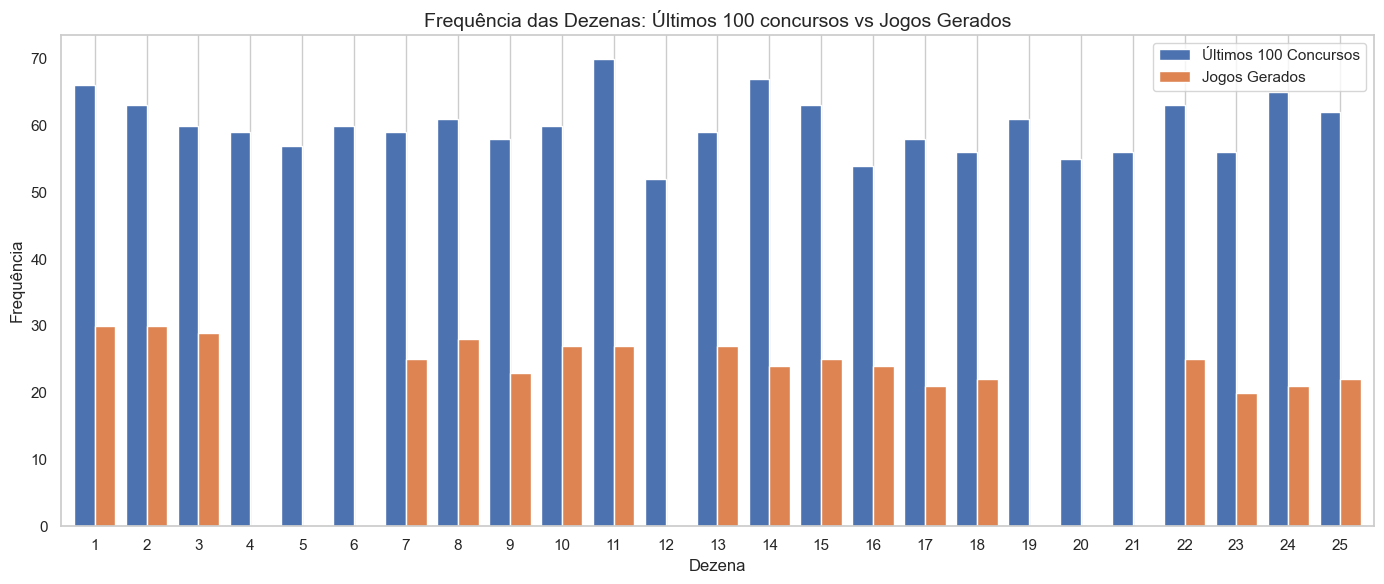

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# --- Parte 1: Frequência nos últimos 100 concursos ---
df_sorted = df.sort_values('Data_Sorteio', ascending=False).reset_index(drop=True)
ultimos_100 = df_sorted.head(100)

# Extrair todas as dezenas dos últimos 100 concursos em uma lista única
todas_dezenas_100 = [dezena for sublist in ultimos_100['Dezenas'] for dezena in sublist]
frequencia_100 = Counter(todas_dezenas_100)

# --- Parte 2: Frequência nas dezenas dos 30 jogos ---
jogos_30 = [
    [1, 2, 3, 7, 8, 9, 11, 13, 14, 15, 16, 17, 22, 23, 25],
    [1, 2, 3, 7, 8, 9, 10, 11, 13, 14, 15, 17, 18, 22, 25],
    [1, 2, 3, 7, 8, 10, 11, 13, 14, 15, 16, 18, 22, 23, 24],
    [1, 2, 7, 8, 9, 10, 11, 14, 15, 16, 17, 18, 22, 24, 25],
    [1, 2, 3, 7, 9, 10, 11, 13, 15, 17, 18, 22, 23, 24, 25],
    [1, 2, 3, 8, 9, 10, 11, 13, 15, 16, 17, 22, 23, 24, 25],
    [1, 2, 3, 7, 8, 9, 11, 13, 14, 15, 16, 17, 18, 23, 25],
    [1, 2, 3, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 24, 25],
    [1, 2, 3, 7, 8, 9, 10, 13, 14, 15, 16, 18, 22, 23, 25],
    [1, 2, 3, 7, 8, 9, 10, 11, 14, 15, 17, 18, 22, 24, 25],
    [1, 2, 3, 7, 8, 10, 11, 13, 14, 15, 16, 17, 22, 23, 25],
    [1, 2, 3, 7, 8, 9, 10, 11, 13, 14, 15, 17, 22, 24, 25],
    [1, 2, 3, 7, 8, 9, 10, 11, 13, 15, 16, 18, 22, 23, 24],
    [1, 2, 3, 7, 8, 9, 11, 13, 14, 15, 16, 17, 22, 23, 24],
    [1, 2, 3, 7, 8, 9, 10, 13, 14, 15, 16, 17, 18, 22, 23],
    [1, 2, 3, 7, 8, 9, 10, 11, 14, 15, 16, 18, 22, 24, 25],
    [1, 2, 3, 7, 8, 9, 10, 11, 13, 14, 16, 18, 23, 24, 25],
    [1, 2, 3, 7, 8, 9, 10, 13, 16, 17, 18, 22, 23, 24, 25],
    [1, 2, 3, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 22, 24],
    [1, 2, 3, 8, 9, 10, 11, 13, 14, 16, 17, 22, 23, 24, 25],
    [1, 2, 3, 7, 8, 9, 10, 11, 13, 14, 18, 22, 23, 24, 25],
    [1, 2, 3, 7, 8, 10, 11, 13, 15, 16, 17, 18, 22, 24, 25],
    [1, 2, 3, 7, 8, 10, 11, 13, 14, 15, 16, 18, 22, 23, 25],
    [1, 2, 3, 8, 9, 10, 11, 13, 14, 15, 16, 17, 18, 22, 23],
    [1, 2, 3, 7, 8, 10, 11, 13, 14, 15, 16, 17, 18, 23, 25],
    [1, 2, 3, 7, 8, 9, 10, 11, 13, 15, 16, 17, 22, 23, 24],
    [1, 2, 3, 7, 9, 10, 11, 13, 14, 15, 16, 17, 22, 24, 25],
    [1, 2, 3, 7, 8, 10, 11, 13, 14, 15, 16, 18, 23, 24, 25],
    [1, 2, 3, 7, 8, 9, 10, 11, 13, 14, 15, 18, 22, 24, 25],
    [1, 2, 3, 8, 9, 10, 11, 13, 14, 16, 17, 18, 22, 23, 24]
]

dezenas_jogos = [dezena for jogo in jogos_30 for dezena in jogo]
frequencia_jogos = Counter(dezenas_jogos)

# --- Parte 3: Organizar para DataFrame e Plot ---
todas_dezenas = list(range(1, 26))
dados = pd.DataFrame({
    'Dezena': todas_dezenas,
    'Últimos 100 Concursos': [frequencia_100.get(d, 0) for d in todas_dezenas],
    'Jogos Gerados': [frequencia_jogos.get(d, 0) for d in todas_dezenas]
})

# --- Gráfico ---
plt.figure(figsize=(14, 6))
sns.set(style="whitegrid")
dados.set_index('Dezena').plot(kind='bar', figsize=(14, 6), width=0.8)
plt.title('Frequência das Dezenas: Últimos 100 concursos vs Jogos Gerados', fontsize=14)
plt.ylabel('Frequência')
plt.xlabel('Dezena')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
